# PV056 project

### Follow the instructions and run the cells in this notebook to reproduce all the results.

In [1]:
!pip3 install requests
!pip3 install matplotlib
!pip3 install pandas
!git clone https://github.com/janmalyy/food-hazard-detection.git
!pip3 install -r food-hazard-detection/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
fatal: destination path 'food-hazard-detection' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import random
import sys

import requests
import pandas as pd
import matplotlib.pyplot as plt

os.environ["WANDB_DISABLED"] = "true"
sys.path.append('/content/food-hazard-detection')

## Load the datasets

In [3]:
dataset_parts = ["train", "test", "valid"]
for dataset_part in dataset_parts:
    url = f"https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/refs/heads/main/data/incidents_{dataset_part}.csv"
    response = requests.get(url)

    with open(f"incidents_{dataset_part}.csv", "wb") as f:
        f.write(response.content)

trainset = pd.read_csv('incidents_train.csv', index_col=0)
validset = pd.read_csv('incidents_valid.csv', index_col=0)
testset = pd.read_csv('incidents_valid.csv', index_col=0)

for dataset in [trainset, validset, testset]:
    dataset.rename(columns={"hazard-category": "hazard_category", "product-category": "product_category"}, inplace=True)

## Explore the data

In [4]:
trainset.sample()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
3178,2018,11,17,us,Swift Beef Company Recalls Ground Beef Product...,"WASHINGTON, Nov. 17, 2018 – Swift Beef Co., a ...",biological,"meat, egg and dairy products",escherichia coli,ground beef


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5082 non-null   int64 
 1   month             5082 non-null   int64 
 2   day               5082 non-null   int64 
 3   country           5082 non-null   object
 4   title             5082 non-null   object
 5   text              5082 non-null   object
 6   hazard_category   5082 non-null   object
 7   product_category  5082 non-null   object
 8   hazard            5082 non-null   object
 9   product           5082 non-null   object
dtypes: int64(3), object(7)
memory usage: 436.7+ KB


In [6]:
trainset.head()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [7]:
for i in range(10):
    x = random.randint(0, len(trainset))
    print(trainset["text"][x])       # change the column name to view another column data
    print()
    print("XXX")
    print()

Hi-Tech Pharmaceuticals. Inc. of Norcross, GA is recalling Lot # 001211197, Exp. 12/25 of Lipodrene w/25mg Ephedra Extract Dietary Supplement due to the presence of 1,4-dimethylamylamine (DMAA). The FDA has warned that DMAA is dangerous because it can narrow blood vessels and arteries and cause a corresponding rise in blood pressure or other cardiovascular problems, such as: Shortness of breath, Arrhythmias, Elevated blood pressure, Tightening in the chest, and Heart attack. ( https://www.fda.gov/food/dietary-supplement-products-ingredients/dmaa-products-marketed-dietary-supplements) Hi-Tech Pharmaceuticals, Inc. is conducting a continuing investigation on the problem. There have been no reported illnesses to date. The voluntary recall was the result of FDA analysis that showed the presence of 1,4-dimethylamylamine in one lot of Lipodrene. Customers who have purchased Lipodrene Lot # 001211197 are advised to stop using this lot of product immediately and return it to the place of purch

KeyError: 4821

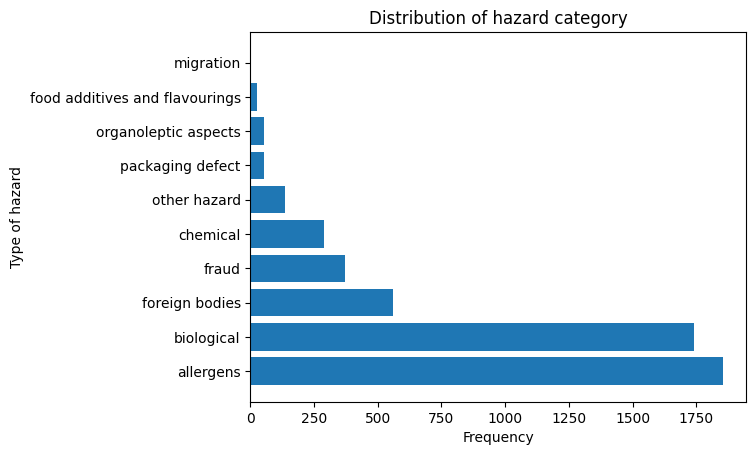

In [8]:
#DISTRIBUTION OF HAZARDS IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['hazard_category'].value_counts().index.to_list(), trainset['hazard_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Frequency')
plt.ylabel('Type of hazard')
plt.title('Distribution of hazard category')
plt.show()

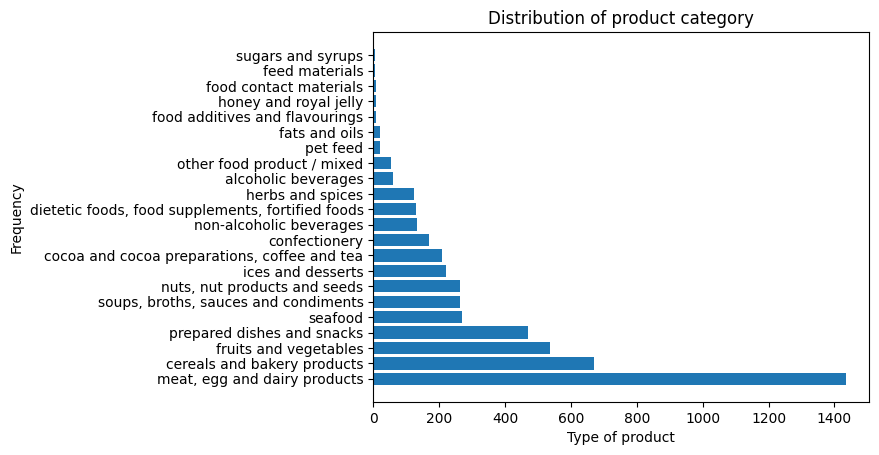

In [9]:
#DISTRIBUTION OF PRODUCT TYPES IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['product_category'].value_counts().index.to_list(), trainset['product_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Type of product')
plt.ylabel('Frequency')
plt.title('Distribution of product category')
plt.show()


## Generate synthetic data for rare product and hazard categories

In [10]:
from food_hazard_detection.balance_dataset import (generate_prompt_triplets_by_hazard, generate_prompt_triplets_by_product,
                             generate_synthetic_data)

from food_hazard_detection import settings
from food_hazard_detection.settings import FILES_DIR, SYNTHETIC_DATA_DIR

rare_hazard_categories = ["migration", "food additives and flavourings",
                              "organoleptic aspects", "packaging defect"]
rare_product_categories = ["sugars and syrups", "feed materials", "food contact materials",
                           "honey and royal jelly", "food additives and flavourings", "fats and oils",
                           "pet feed", "other food product / mixed", "alcoholic beverages"]

ModuleNotFoundError: No module named 'mistralai'

In [11]:
combinations_hazard = generate_prompt_triplets_by_hazard(rare_hazard_categories, trainset)
generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_hazard.csv",
                        FILES_DIR / "prompts/generate_synthetic_data.md", combinations_hazard)

combinations_product = generate_prompt_triplets_by_product(rare_product_categories, trainset)
generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_product.csv",
                        FILES_DIR / "prompts/generate_synthetic_data.md", combinations_product)

print("Number of generated synthetic data points:", len(combinations_hazard)+len(combinations_product))

NameError: name 'generate_prompt_triplets_by_hazard' is not defined

The data produced by Mistral are not perfect. So at this point some manual curration is needed (e.g. quote the text column to parse the csv properly or drop some rows with missing values). Because of that, we use later in the code already preprocessed synthetic data.

Load and check the generated data.
We generated smaller and bigger amount of synthetic data and we want to test whether it has some impact on performance.

In [12]:
synthetic_data_small = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_small.csv")
print(synthetic_data_small.info())

NameError: name 'SYNTHETIC_DATA_DIR' is not defined

In [13]:
synthetic_data_big = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_big.csv")
print(synthetic_data_big.info())

NameError: name 'SYNTHETIC_DATA_DIR' is not defined

In [14]:
train_small = pd.concat([trainset, synthetic_data_small], ignore_index=True)
train_big = pd.concat([trainset, synthetic_data_big], ignore_index=True)

NameError: name 'synthetic_data_small' is not defined

# Bert and RoBERTa
- [Bert](https://huggingface.co/docs/transformers/model_doc/bert)
- [RoBERTa](https://huggingface.co/docs/transformers/model_doc/roberta)

In [15]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, BertTokenizer, BertForSequenceClassification, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict
import torch

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [49]:
def assign_labels(dataset, column, label_dict):
    # autoencoding
    unique_values = dataset[column].unique()
    for value in unique_values:
        if value not in label_dict:
            label_dict[value] = len(label_dict)


def transform_dataset(dataset):
    for split in dataset.keys():
        dataset[split] = dataset[split].replace({
            "hazard_category": labels_hazard_categories,
            "product_category": labels_product_categories,
            "product": labels_products,
            "hazard": labels_hazards
        })
        dataset[split]["text"] = dataset[split]["title"] + ": " + dataset[split]["text"]
        dataset[split] = dataset[split].drop(columns=["day", "month", "year", "country", "title"])

    return dataset

def compute_score(hazards_true, products_true, hazards_pred, products_pred):
    # compute f1 for hazards:
    f1_hazards = f1_score(
        hazards_true,
        hazards_pred,
        average='macro'
    )

    # compute f1 for products:
    f1_products = f1_score(
        products_true[hazards_pred == hazards_true],
        products_pred[hazards_pred == hazards_true],
        average='macro'
    )

    return (f1_hazards + f1_products) / 2.

In [50]:
labels_hazard_categories = {}
labels_hazards = {}
labels_product_categories = {}
labels_products = {}

unique_products = set()
for split in [trainset, validset, testset]:
    unique_products.update(split["product"])

assign_labels(trainset, "hazard_category", labels_hazard_categories)
assign_labels(trainset, "hazard", labels_hazards)
assign_labels(trainset, "product_category", labels_product_categories)

for value in unique_products:
    if value not in labels_products:
        labels_products[value] = len(labels_products)

In [51]:
trainset.head()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


## BERT

In [63]:
bert_dataset = transform_dataset({"train": trainset.copy(), "valid": validset.copy(), "test": testset.copy()})


/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[split] = dataset[split].replace({
/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[split] = dataset[split].replace({
/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

In [64]:
bert_dataset["train"]["product_category"]

0        0
1        0
2        0
3        0
4        0
        ..
5979     2
5980     1
5981    13
5982     0
5983     1
Name: product_category, Length: 5082, dtype: int64

In [65]:
bert_dataset = DatasetDict({"train" : Dataset.from_pandas(bert_dataset["train"]),"valid" : Dataset.from_pandas(bert_dataset["valid"]), "test" : Dataset.from_pandas(bert_dataset["test"])})

In [66]:
bert_tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

def bert_tokenize_function(examples):
    return bert_tokenizer(examples["text"], truncation=True, padding="max_length")

In [67]:
bert_tokenized = bert_dataset.map(bert_tokenize_function, batched=True)

Map:   0%|          | 0/5082 [00:00<?, ? examples/s]

Map:   0%|          | 0/565 [00:00<?, ? examples/s]

Map:   0%|          | 0/565 [00:00<?, ? examples/s]

In [68]:
bert_data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

bert_training_args = TrainingArguments("test_trainer",
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch")

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
bert_trainers = dict()

for category in ['hazard', 'product', 'product_category', 'hazard_category']:
    train_dataset = bert_tokenized["train"].rename_column(category, "label")
    eval_dataset = bert_tokenized["valid"].rename_column(category, "label")

    bert_model = AutoModelForSequenceClassification.from_pretrained(
        "distilbert/distilbert-base-uncased", num_labels=trainset[category].nunique()
    ).to(device)

    trainer = Trainer(
        model=bert_model,
        args=bert_training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        processing_class=bert_tokenizer,
        data_collator=bert_data_collator,
    )

    trainer.train()

    bert_trainers[category] = trainer

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,2.209900,1.141758


In [ ]:
devset_bert = {}

for category in bert_trainers.keys():
    devset_bert[category] = bert_trainers[category].predict(bert_tokenized[category])

In [ ]:
predictions_hazard_cat = bert_trainers['hazard-category'].predict(bert_tokenized['valid'])
predictions_product_cat = bert_trainers['product-category'].predict(bert_tokenized['valid'])

devset_bert["predictions-hazard-category"] = predictions_hazard_cat.predictions.argmax(axis=-1)
devset_bert["predictions-product-category"] = predictions_product_cat.predictions.argmax(axis=-1)

print(f"Score Sub-Task 1: {compute_score(devset_bert['hazard-category'], devset_bert['product-category'], devset_bert['predictions-hazard-category'], devset_bert['predictions-product-category']):.3f}")

predictions_hazard = bert_trainers['hazard'].predict(bert_tokenized['valid'])
predictions_product = bert_trainers['product'].predict(bert_tokenized['valid'])

devset_bert["predictions-hazard"] = predictions_hazard.predictions.argmax(axis=-1)
devset_bert["predictions-product"] = predictions_product.predictions.argmax(axis=-1)

print(f"Score Sub-Task 2: {compute_score(devset_bert['hazard'], devset_bert['product'], devset_bert['predictions-hazard'], devset_bert['predictions-product']):.3f}")

## RoBERTa

In [55]:
roberta_dataset = transform_dataset({"train": trainset.copy(), "valid": validset.copy(), "test": testset.copy()})

/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[split] = dataset[split].replace({
/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[split] = dataset[split].replace({
/tmp/ipykernel_77470/3663636310.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

In [56]:
trainset.head()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [57]:
roberta_dataset = DatasetDict({"train" : Dataset.from_pandas(roberta_dataset["train"]),"valid" : Dataset.from_pandas(roberta_dataset["valid"]), "test" : Dataset.from_pandas(roberta_dataset["test"])})

In [58]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def roberta_tokenize_function(examples):
    return roberta_tokenizer(examples["text"], truncation=True, padding="max_length")

In [59]:
roberta_tokenized = roberta_dataset.map(roberta_tokenize_function, batched=True)

Map:   0%|          | 0/5082 [00:00<?, ? examples/s]

Map:   0%|          | 0/565 [00:00<?, ? examples/s]

Map:   0%|          | 0/565 [00:00<?, ? examples/s]

In [60]:
roberta_data_collator = DataCollatorWithPadding(tokenizer=roberta_tokenizer)

roberta_training_args = TrainingArguments("test_trainer",
                                  num_train_epochs=3,
                                  weight_decay=0.01,
                                  eval_strategy="epoch")

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [61]:
train_dataset = roberta_tokenized["train"].rename_column("hazard", "label")
eval_dataset = roberta_tokenized["valid"].rename_column("hazard", "label")

In [62]:
roberta_trainers = dict()

for category in ['product_category', 'hazard_category']:
    train_dataset = roberta_tokenized["train"].rename_column(category, "label")
    eval_dataset = roberta_tokenized["valid"].rename_column(category, "label")

    roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=trainset[category].nunique()).to(device)

    trainer = Trainer(
        model=roberta_model,
        args=roberta_training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        processing_class=roberta_tokenizer,
        data_collator=roberta_data_collator,
    )

    trainer.train()

    roberta_trainers[category] = trainer

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
devset_roberta = {}

for category in roberta_trainers.keys():
    devset_roberta[category] = roberta_trainers[category].predict(roberta_tokenized[category])

In [ ]:
predictions_hazard_cat = roberta_trainers['hazard-category'].predict(roberta_tokenized['valid'])
predictions_product_cat = roberta_trainers['product-category'].predict(roberta_tokenized['valid'])

devset_roberta["predictions-hazard-category"] = predictions_hazard_cat.predictions.argmax(axis=-1)
devset_roberta["predictions-product-category"] = predictions_product_cat.predictions.argmax(axis=-1)

print(f"Score Sub-Task 1: {compute_score(devset_roberta['hazard-category'], devset_roberta['product-category'], devset_roberta['predictions-hazard-category'], devset_roberta['predictions-product-category']):.3f}")

predictions_hazard = roberta_trainers['hazard'].predict(roberta_tokenized['valid'])
predictions_product = roberta_trainers['product'].predict(roberta_tokenized['valid'])

devset_roberta["predictions-hazard"] = predictions_hazard.predictions.argmax(axis=-1)
devset_roberta["predictions-product"] = predictions_product.predictions.argmax(axis=-1)

print(f"Score Sub-Task 2: {compute_score(devset_roberta['hazard'], devset_roberta['product'], devset_roberta['predictions-hazard'], devset_roberta['predictions-product']):.3f}")